In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [44]:
data = pd.read_excel(r"C:\Users\79169\Downloads\Данные.xlsx")
data

,ID,FIO,Профессия,Разряд,Оборудование,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
0,1,Журавлев Б. И.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,180,1950,NaN
1,2,Степанов А. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,228,1950,NaN
2,3,Федотов М. М.,Уборщик,2,Вспомогательные помещения,1.0,2022-01-01,252,1950,NaN
3,4,Абрамов Е. Д.,Уборщик,2,Пилигримовые станы,3.3,2022-01-01,240,1950,NaN
4,5,Волков Д. М.,Подручный вальцовщика,2,Пилигримовые станы,3.3,2022-01-01,252,1950,NaN
...,...,...,...,...,...,...,...,...,...,...
2395,2396,Румянцев М. А.,Вальцовщик,8,Пилигримовые станы,3.3,2022-12-01,180,1500,NaN
2396,2397,Верещагин Я. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,180,1500,NaN
2397,2398,Власов С. Д.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,156,1500,NaN
2398,2399,Волков А. А.,Вальцовщик,8,Прошивной стан,3.3,2022-12-01,192,1500,NaN


In [5]:
data.isnull().sum()

ID                      0
FIO                     0
Профессия               0
Разряд                  0
Оборудование            0
Класс вредности         0
Месяц                   0
Отработанные часы       0
Объем производства      0
Доход (руб.)          849
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  2400 non-null   int64         
 1   FIO                 2400 non-null   object        
 2   Профессия           2400 non-null   object        
 3   Разряд              2400 non-null   int64         
 4   Оборудование        2400 non-null   object        
 5   Класс вредности     2400 non-null   float64       
 6   Месяц               2400 non-null   datetime64[ns]
 7   Отработанные часы   2400 non-null   int64         
 8   Объем производства  2400 non-null   int64         
 9   Доход (руб.)        1551 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 187.6+ KB


In [4]:
data.describe()

,ID,Разряд,Класс вредности,Месяц,Отработанные часы,Объем производства,Доход (руб.)
count,2400.000000,2400.000000,2400.000000,2400,2400.000000,2400.000000,1551.000000
mean,1200.500000,4.900000,2.934000,2022-06-16 12:00:00,192.400000,1595.833333,30211.722108
min,1.000000,2.000000,1.000000,2022-01-01 00:00:00,72.000000,890.000000,8534.020000
25%,600.750000,4.000000,3.175000,2022-03-24 06:00:00,168.000000,1452.500000,20821.740000
50%,1200.500000,5.000000,3.300000,2022-06-16 00:00:00,192.000000,1560.000000,27207.670000
75%,1800.250000,6.000000,3.325000,2022-09-08 12:00:00,216.000000,1825.000000,37477.220000
max,2400.000000,8.000000,3.400000,2022-12-01 00:00:00,348.000000,2250.000000,76519.860000
std,692.964646,1.676655,0.757881,NaN,46.512164,344.853385,12719.975479


In [45]:
features = ['Разряд', 'Класс вредности', 'Отработанные часы', 'Объем производства']

In [8]:
X = data[features].dropna()
y = data['Доход (руб.)'].dropna()

Убираем строки с пропущенными значениями

In [15]:
X = X.loc[y.index]

In [16]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
coeff = model.coef_
inter = model.intercept_

In [18]:
formula = f"Доход = {inter:.2f} + " + " + ".join([f"{coef:.2f}*{feat}" for coef, feat in zip(coeff, features)])

In [19]:
print(formula)

Доход = -37927.92 + 2807.75*Разряд + 2394.05*Класс вредности + 232.40*Отработанные часы + 2.00*Объем производства


In [20]:
X_missing = data[features][data['Доход (руб.)'].isnull()]
predicted_income = model.predict(X_missing)

,Разряд,Класс вредности,Отработанные часы,Объем производства
0,2,1.0,180,1950
1,2,1.0,228,1950
2,2,1.0,252,1950
3,2,3.3,240,1950
4,2,3.3,252,1950
...,...,...,...,...
2395,8,3.3,180,1500
2396,8,3.3,180,1500
2397,8,3.3,156,1500
2398,8,3.3,192,1500




Проверим, насколько точно наша формула предсказывает доход:





In [22]:
data.loc[data['Доход (руб.)'].isnull(), 'Доход (руб.)'] = predicted_income

In [25]:
predicted_income_all = model.predict(data[features])
data['Предсказанный доход'] = predicted_income_all
data['Разница'] = data['Доход (руб.)'] - data['Предсказанный доход']

In [26]:
# Выводим максимальную и минимальную разницу
max_diff = data['Разница'].max()
min_diff = data['Разница'].min()

(max_diff, min_diff)

(12972.186264826109, -4469.28683631165)

In [ ]:
correlation_matrix = data[features].corr()


In [33]:
data = data.drop(['Предсказанный доход','Разница'], axis=1)

In [40]:
data[features]

,Разряд,Класс вредности,Отработанные часы,Объем производства
0,2,1.0,180,1950
1,2,1.0,228,1950
2,2,1.0,252,1950
3,2,3.3,240,1950
4,2,3.3,252,1950
...,...,...,...,...
2395,8,3.3,180,1500
2396,8,3.3,180,1500
2397,8,3.3,156,1500
2398,8,3.3,192,1500


In [30]:
correlation_matrix

,Разряд,Класс вредности,Отработанные часы,Объем производства
Разряд,1.000000e+00,6.093648e-02,-0.003400,-9.187713e-17
Класс вредности,6.093648e-02,1.000000e+00,0.007844,-2.430667e-15
Отработанные часы,-3.399513e-03,7.844253e-03,1.000000,8.922562e-01
Объем производства,-9.187713e-17,-2.430667e-15,0.892256,1.000000e+00


<Axes: >

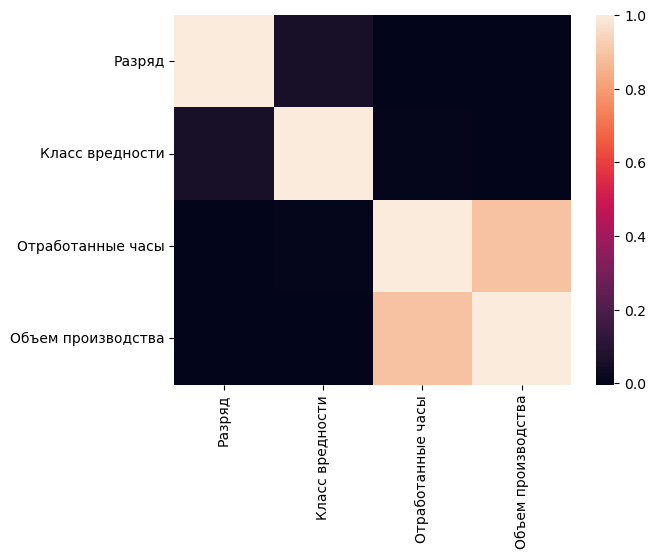

In [42]:
sns.heatmap(correlation_matrix)